In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import re

In [98]:
CIQUAL_DATASET_PATH = 'data/TableCiqual2017_ExcelFR_2017 11 17.xls'

ciqual_df = pd.read_excel(CIQUAL_DATASET_PATH)
ciqual_df.head(5)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_fr.1,"Energie, Règlement UE N° 1169/2011 (kcal/100g)",...,Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
0,1,101,0,entrées et plats composés,salades composées et crudités,-,25600,"Céleri rémoulade, préemballé","Céleri rémoulade, préemballé",-,...,-,-,"25,2","< 0,04","< 0,04","0,38","0,28","0,19",28,"< 0,08"
1,1,101,0,entrées et plats composés,salades composées et crudités,-,25601,"Salade de thon et légumes, appertisée, égouttée","Salade de thon et légumes, appertisée, égouttée",-,...,-,-,"2,75","< 0,04","0,053","4,45","< 0,16","0,29",31,"1,45"
2,1,101,0,entrées et plats composés,salades composées et crudités,-,25602,"Salade composée avec viande ou poisson, appert...","Salade composée avec viande ou poisson, appert...",-,...,"9,75",-,-,"0,032","0,022","4,13","0,2","0,12","11,1","1,23"
3,1,101,0,entrées et plats composés,salades composées et crudités,-,25605,Champignon à la grecque,Champignon à la grecque,-,...,-,-,"10,3","0,062","0,2","1,88","0,76","0,11","27,3","0,018"
4,1,101,0,entrées et plats composés,salades composées et crudités,-,25606,Salade de pommes de terre maison,Salade de pommes de terre maison,-,...,-,-,10,"0,077","0,06","0,89","0,53","0,14",7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2802,11,1103,0,aliments infantiles,desserts infantiles,-,13166,Dessert lacté infantile nature sucré ou aux fr...,Dessert lacté infantile nature sucré ou aux fr...,"95,8",...,-,-,"6,72","0,03","0,11","0,12","0,26","0,029","9,06","0,2"
2803,11,1104,0,aliments infantiles,céréales et biscuits infantiles,-,13167,"Céréales instantanées, poudre à reconstituer, ...","Céréales instantanées, poudre à reconstituer, ...",393,...,-,-,"42,7","0,66","0,04","5,02","1,33","0,38",100,"0,44"
2804,11,1104,0,aliments infantiles,céréales et biscuits infantiles,-,13168,"Céréales instantanées, poudre à reconstituer, ...","Céréales instantanées, poudre à reconstituer, ...",391,...,-,-,"33,4","0,7","0,04","4,43","1,58","0,29","86,5","0,29"
2805,11,1104,0,aliments infantiles,céréales et biscuits infantiles,-,24689,Biscuit pour bébé,Biscuit pour bébé,437,...,-,-,"< 0,5","0,63","0,62","5,9","4,69","0,66","31,1","0,28"


The dataframe has 3 hierarchical columns for the categories of food. We can use those to extract some specific types of aliments such as 'fruits' or 'vegetables'.

In [51]:
ciqual_df['alim_grp_nom_fr'].value_counts()

viandes, œufs, poissons                        739
fruits, légumes, légumineuses et oléagineux    437
produits céréaliers                            402
entrées et plats composés                      308
boissons                                       274
lait et produits laitiers                      245
aides culinaires et ingrédients divers         191
matières grasses                                71
produits sucrés                                 67
aliments infantiles                             36
glaces et sorbets                               26
Name: alim_grp_nom_fr, dtype: int64

In [52]:
ciqual_df['alim_ssgrp_nom_fr'].value_counts()

légumes                                              208
charcuteries                                         159
viandes crues                                        153
plats composés                                       137
céréales de petit-déjeuner et biscuits               137
boissons sans alcool                                 129
viandes cuites                                       125
fromages                                             125
poissons crus                                        108
produits laitiers frais et assimilés                  96
eaux                                                  96
fruits                                                93
gâteaux et pâtisseries                                79
pains et viennoiseries                                78
pâtes, riz et céréales                                64
sauces                                                63
poissons cuits                                        61
produits à base de poissons et 

In [53]:
ciqual_df['alim_ssssgrp_nom_fr'].value_counts()

-                                    1032
légumes crus                          113
légumes cuits                          91
bœuf et veau                           75
biscuits sucrés                        64
                                     ... 
laits autres que de vache               5
légumes séchés ou déshydratés           4
plats de poisson et féculents           4
boissons rafraîchissantes lactées       4
sauces sucrées                          2
Name: alim_ssssgrp_nom_fr, Length: 76, dtype: int64

In [54]:
vegetables_df = ciqual_df[ciqual_df['alim_ssgrp_nom_fr'] == 'légumes']
vegetables_df.head(5)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_fr.1,"Energie, Règlement UE N° 1169/2011 (kcal/100g)",...,Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
308,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,13004,"Avocat, pulpe, cru","Avocat, pulpe, cru",155,...,"14,5",-,"4,07","0,05","0,13","1,2","0,77","0,12","79,9",0
309,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20004,"Bette ou blette, crue","Bette ou blette, crue","12,3",...,"< 0,8",-,"3,08","< 0,015","0,015","< 0,1","0,2","0,036","24,7",0
310,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20009,"Carotte, crue","Carotte, crue","36,4",...,"13,8",-,"5,84","0,054","0,047","0,99","0,28","0,13","32,3",0
311,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20010,"Champignon, tout type, cru","Champignon, tout type, cru","21,6",...,0,-,"3,4","0,084","0,42","4,55","1,75","0,082",29,0
312,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20012,"Salade ou chicorée frisée, crue","Salade ou chicorée frisée, crue","22,7",...,298,-,"18,5","0,07","0,088","0,45","1,03","0,063",126,0


It is interesting to note that the vegetables are present in both in 'raw' and 'cooked' form (french: cuit et cru), thus it would be interesting to analyse the differences in nutrients when cooking the vegetables differently.  

In [55]:
vegetables_raw_df = vegetables_df[vegetables_df['alim_ssssgrp_nom_fr'].str.contains('crus')]
vegetables_raw_df.head(5)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_fr.1,"Energie, Règlement UE N° 1169/2011 (kcal/100g)",...,Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
308,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,13004,"Avocat, pulpe, cru","Avocat, pulpe, cru",155,...,"14,5",-,"4,07","0,05","0,13","1,2","0,77","0,12","79,9",0
309,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20004,"Bette ou blette, crue","Bette ou blette, crue","12,3",...,"< 0,8",-,"3,08","< 0,015","0,015","< 0,1","0,2","0,036","24,7",0
310,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20009,"Carotte, crue","Carotte, crue","36,4",...,"13,8",-,"5,84","0,054","0,047","0,99","0,28","0,13","32,3",0
311,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20010,"Champignon, tout type, cru","Champignon, tout type, cru","21,6",...,0,-,"3,4","0,084","0,42","4,55","1,75","0,082",29,0
312,2,201,20101,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,20012,"Salade ou chicorée frisée, crue","Salade ou chicorée frisée, crue","22,7",...,298,-,"18,5","0,07","0,088","0,45","1,03","0,063",126,0


In [56]:
vegetables_cooked_df = vegetables_df[vegetables_df['alim_ssssgrp_nom_fr'].str.contains('cuits')]
vegetables_cooked_df.head(5)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_fr.1,"Energie, Règlement UE N° 1169/2011 (kcal/100g)",...,Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
421,2,201,20102,"fruits, légumes, légumineuses et oléagineux",légumes,légumes cuits,20000,"Artichaut, cuit","Artichaut, cuit","33,2",...,"14,8",-,"9,1","0,05","0,089","1,11","0,24","0,081",89,0
422,2,201,20102,"fruits, légumes, légumineuses et oléagineux",légumes,légumes cuits,20001,"Asperge, bouillie/cuite à l'eau","Asperge, bouillie/cuite à l'eau","19,8",...,"65,3",-,"16,1","0,11","0,12","1,06","0,19","0,05",142,0
423,2,201,20102,"fruits, légumes, légumineuses et oléagineux",légumes,légumes cuits,20002,"Aubergine, cuite","Aubergine, cuite","32,7",...,"2,9",-,"1,3","0,076","0,02","0,6","0,075","0,086",14,0
424,2,201,20102,"fruits, légumes, légumineuses et oléagineux",légumes,légumes cuits,20003,"Betterave rouge, cuite","Betterave rouge, cuite","47,2",...,"0,2",-,"3,6","0,027","0,04","0,33","0,15","0,067",80,0
425,2,201,20102,"fruits, légumes, légumineuses et oléagineux",légumes,légumes cuits,20005,"Bette ou blette, cuite","Bette ou blette, cuite","12,1",...,"< 0,8",-,"< 0,5","< 0,015","< 0,01","< 0,1","0,17","0,024","43,2",0


Let's analyse the difference in vitamins composition between raw and cooked vegetables. We keep only the vitamin columns:

In [57]:
vitamins_columns = vegetables_cooked_df.columns[vegetables_cooked_df.columns.str.contains('Vitamine')]

vitamins_raw_df = vegetables_raw_df[vitamins_columns].copy()
#vitamins_raw_df.head(5)

vitamins_cooked_df = vegetables_cooked_df[vitamins_columns].copy()
vitamins_cooked_df.head(5)

,Vitamine D (µg/100g),Vitamine E (mg/100g),Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
421,0,"0,19","14,8",-,"9,1","0,05","0,089","1,11","0,24","0,081",89,0
422,0,"1,35","65,3",-,"16,1","0,11","0,12","1,06","0,19","0,05",142,0
423,0,"0,41","2,9",-,"1,3","0,076","0,02","0,6","0,075","0,086",14,0
424,0,"0,04","0,2",-,"3,6","0,027","0,04","0,33","0,15","0,067",80,0
425,"< 0,25","0,41","< 0,8",-,"< 0,5","< 0,015","< 0,01","< 0,1","0,17","0,024","43,2",0


Unfortunately, these columns are strings (with the decimal numbers with the french notation with a comma instead of a point), so we need to convert them to float numbers. Additionally, we have the special caracters `<` and `>` that are sometimes present. To remove these, we simply convert them to the value next to the `<` or `>` sign.

Additionally, the column `Vitamine K2 (µg/100g)` contains only the value `-` (meaning there is no available information according to the [dataset description](https://ciqual.anses.fr/cms/sites/default/files/inline-files/TableCiqual2017_Excel_docFR.pdf)), and similarly the column `Vitamine B12 (µg/100g)` is almost empty or 0, so we drop them.

In [58]:
vitamins_raw_df.drop(columns=['Vitamine K2 (µg/100g)', 'Vitamine B12 (µg/100g)'], inplace=True)
vitamins_cooked_df.drop(columns=['Vitamine K2 (µg/100g)', 'Vitamine B12 (µg/100g)'], inplace=True)

def convert_to_float(value):
    # TODO replace '-' and other incorret values with NaN instead of 0 ?
    try:
        if type(value) == float:
            return value
        
        float_value = float(value.replace(',', '.'))
        return float_value
    except ValueError:
        if value == '-':
            return 0.0
        else:
            numbers = re.findall( r'\d+\.*\d*', value)
            
            if numbers:
                return float(numbers[0])
            else:
                return 0.0

vitamins_raw_df = vitamins_raw_df.applymap(convert_to_float)
#vitamins_raw_df.head(5)

vitamins_cooked_df = vitamins_cooked_df.applymap(convert_to_float)
vitamins_cooked_df.head(5)

,Vitamine D (µg/100g),Vitamine E (mg/100g),Vitamine K1 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g)
421,0.0,0.19,14.8,9.1,0.050,0.089,1.11,0.240,0.081,89.0
422,0.0,1.35,65.3,16.1,0.110,0.120,1.06,0.190,0.050,142.0
423,0.0,0.41,2.9,1.3,0.076,0.020,0.60,0.075,0.086,14.0
424,0.0,0.04,0.2,3.6,0.027,0.040,0.33,0.150,0.067,80.0
425,0.0,0.41,0.0,0.0,0.000,0.000,0.00,0.170,0.024,43.2


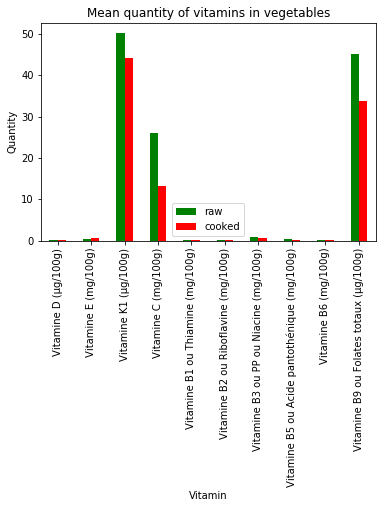

In [63]:
vitamins_grouped_df = pd.DataFrame([vitamins_raw_df.mean().rename('raw'),
                                    vitamins_cooked_df.mean().rename('cooked')])

vitamins_grouped_df = vitamins_grouped_df.transpose()

vitamins_grouped_df.plot(kind='bar', color=['green', 'red'])

plt.title('Mean quantity of vitamins in vegetables')
plt.xlabel('Vitamin')
plt.ylabel('Quantity')

plt.show()

We clearly see that part of the vitamins K1, C and B9 are lost in the cooking process.

In [65]:
beverages_df = ciqual_df[ciqual_df['alim_grp_nom_fr'] == 'boissons']
beverages_no_alcohol_df = beverages_df[beverages_df['alim_ssgrp_nom_fr'] == 'boissons sans alcool']
juices_df = beverages_no_alcohol_df[beverages_no_alcohol_df['alim_ssssgrp_nom_fr'] == 'jus']
juices_df.head(5)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_fr.1,"Energie, Règlement UE N° 1169/2011 (kcal/100g)",...,Vitamine K1 (µg/100g),Vitamine K2 (µg/100g),Vitamine C (mg/100g),Vitamine B1 ou Thiamine (mg/100g),Vitamine B2 ou Riboflavine (mg/100g),Vitamine B3 ou PP ou Niacine (mg/100g),Vitamine B5 ou Acide pantothénique (mg/100g),Vitamine B6 (mg/100g),Vitamine B9 ou Folates totaux (µg/100g),Vitamine B12 (µg/100g)
2237,6,602,60201,boissons,boissons sans alcool,jus,2000,"Jus d'ananas, à base de concentré","Jus d'ananas, à base de concentré","49,7",...,"0,3",-,15,"0,058","0,021","0,2","0,056","0,1",18,0
2238,6,602,60201,boissons,boissons sans alcool,jus,2002,"Jus multifruit, pur jus, multivitaminé","Jus multifruit, pur jus, multivitaminé",-,...,-,-,24,"0,24","0,32","0,29","0,095","0,33","30,5",0
2239,6,602,60201,boissons,boissons sans alcool,jus,2004,Jus de fruits (aliment moyen),Jus de fruits (aliment moyen),43,...,"0,12",NaN,"32,9","0,072","0,041","0,36","0,21","0,095","24,1",0
2240,6,602,60201,boissons,boissons sans alcool,jus,2006,"Jus de carotte, pur jus","Jus de carotte, pur jus",-,...,"15,5",-,"8,5","0,092","0,055","0,39","0,23","0,22",4,0
2241,6,602,60201,boissons,boissons sans alcool,jus,2007,"Jus de citron, maison","Jus de citron, maison","28,9",...,0,-,"42,4","0,022","0,013","0,096","0,12","0,048","13,5",0


In [66]:
juices_homemade_df = juices_df[juices_df['alim_nom_fr'].str.contains('maison')][vitamins_columns].copy()
juices_pure_df = juices_df[juices_df['alim_nom_fr'].str.contains('pur')][vitamins_columns].copy()
juices_concentrated_df = juices_df[juices_df['alim_nom_fr'].str.contains('concentré')][vitamins_columns].copy()

juices_homemade_df = juices_homemade_df.applymap(convert_to_float)
juices_pure_df = juices_pure_df.applymap(convert_to_float)
juices_concentrated_df = juices_concentrated_df.applymap(convert_to_float)

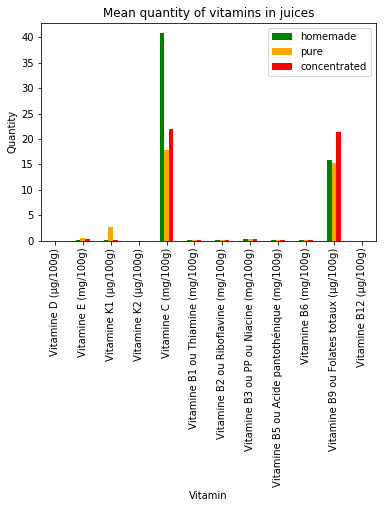

In [67]:
juices_grouped_df = pd.DataFrame([juices_homemade_df.mean().rename('homemade'),
                                  juices_pure_df.mean().rename('pure'),
                                  juices_concentrated_df.mean().rename('concentrated')])

juices_grouped_df = juices_grouped_df.transpose()

juices_grouped_df.plot(kind='bar', color=['green', 'orange', 'red'])

plt.title('Mean quantity of vitamins in juices')
plt.xlabel('Vitamin')
plt.ylabel('Quantity')

plt.show()

It would be interesting to assess the differences between homemade juice and concentrated juice, and to compare them with products from the open food facts dataset.

Let's load the openfoodfacts dataset

In [3]:
OPEN_FOOD_FACTS_PATH = 'data/en.openfoodfacts.org.products.csv'
food_facts_df = pd.read_csv(OPEN_FOOD_FACTS_PATH, delimiter='\t')
food_facts_df.head(5)

C:\Users\Thomas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are some product where the name is not indicated, hence they are useless and we drop them.

In [4]:
food_facts_df.dropna(subset=['product_name'], inplace=True)

In [219]:
for i in food_facts_df.columns:
    print(i)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_fr
nova_group
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
main_category
main_category_en
image_url
image_small_url
image_ingredients_url
image_ingredients_small_url
image_n

In [83]:
kept_columns = ['product_name', 'quantity', 'packaging', 'categories', 'labels', 'nutrition_grade_fr',
                'ingredients_text', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 
                'salt_100g', 'sodium_100g', 'saturated-fat_100g', 'fiber_100g', 'nutrition-score-uk_100g', 
                'nutrition-score-fr_100g', 'calcium_100g', 'cholesterol_100g', 'trans-fat_100g', 'iron_100g',
                'vitamin-c_100g', 'vitamin-a_100g']

interesting_facts_df = food_facts_df[kept_columns]
interesting_facts_df.dropna().head(5)

,product_name,quantity,packaging,categories,labels,nutrition_grade_fr,ingredients_text,proteins_100g,fat_100g,carbohydrates_100g,...,saturated-fat_100g,fiber_100g,nutrition-score-uk_100g,nutrition-score-fr_100g,calcium_100g,cholesterol_100g,trans-fat_100g,iron_100g,vitamin-c_100g,vitamin-a_100g
2724,Nutella,1 kg,Pot,"Spreads, Breakfasts, Sweet spreads, fr:Pâtes à...",Fabriqué au Canada,e,"Sugar, palm oil, _hazelnuts_, cocoa, skim _mil...",5.41,32.4,56.8,...,10.80,2.7,24.0,24.0,0.1080,0.0,0.0,0.001950,0.0,0.0
2726,Nutella,13 oz,Plastic,"Spreads, Breakfasts, Sweet spreads, fr:Pâtes à...",Gluten-free,e,"Sugar, Palm Oil, _Hazelnuts_, Cocoa, Skim _Mil...",5.41,32.4,56.8,...,10.80,1.0,25.0,25.0,0.0400,0.0,0.0,0.000720,0.0,0.0
2727,Nutella,750 g,"Jar,Glass","Spreads,Breakfasts,Sweet spreads,fr:Pâtes à ta...",Verified,e,"sugar, palm oil, hazelnuts , cocoa, skim milk...",5.41,32.4,56.8,...,10.80,2.7,24.0,24.0,0.1080,0.0,0.0,0.001950,0.0,0.0
3098,Milk Duds,5 OZ (141 g),Card,"Snacks, Sweet snacks, Confectioneries, Candies","Kosher, Orthodox Union Kosher",e,"corn syrup, sugar, vegetable oil (cocoa butter...",2.56,15.4,69.2,...,8.97,0.0,26.0,26.0,0.0513,0.0,0.0,0.000000,0.0,0.0
3101,Whoppers,5 OZ (141 g),"box,card",Bonbons,"Low or no fat,Low fat,Kosher,Reduced fat,25% l...",e,"sugar, corn syrup, partially hydrogenated palm...",2.44,17.1,75.6,...,17.10,0.0,27.0,27.0,0.1460,0.0,0.0,0.000878,0.0,0.0


Let find certain types of food

In [84]:
food = 'banane'
food_df = food_facts_df[food_facts_df['product_name'].str.contains(food)]
food_df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
553,00000625,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1571139104,2019-10-15T11:31:44Z,1571139105,2019-10-15T11:31:45Z,Chips de banane,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,000071812,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1571751639,2019-10-22T13:40:39Z,1571751641,2019-10-22T13:40:41Z,Proteine banane,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19740,203739,http://world-en.openfoodfacts.org/product/0020...,kiliweb,1562068030,2019-07-02T11:47:10Z,1562068785,2019-07-02T11:59:45Z,Yaourt grec banane miel,NaN,170 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,0048500019634,http://world-en.openfoodfacts.org/product/0048...,openfoodfacts-contributors,1570280405,2019-10-05T13:00:05Z,1570280728,2019-10-05T13:05:28Z,Tropics orange fraise banane,NaN,"1,75 l",...,NaN,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80912,59749943413,http://world-en.openfoodfacts.org/product/0059...,openfoodfacts-contributors,1555852534,2019-04-21T13:15:34Z,1555852639,2019-04-21T13:17:19Z,muffin pépites de chocolat et banane,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038732,9002859092657,http://world-en.openfoodfacts.org/product/9002...,kiliweb,1540731543,2018-10-28T12:59:03Z,1540731546,2018-10-28T12:59:06Z,Schoko bananen,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040171,9010128008117,http://world-en.openfoodfacts.org/product/9010...,kiliweb,1552260095,2019-03-10T23:21:35Z,1563340770,2019-07-17T05:19:30Z,Iso whey banane,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040864,90400526,http://world-en.openfoodfacts.org/product/9040...,kiliweb,1570960106,2019-10-13T09:48:26Z,1570960108,2019-10-13T09:48:28Z,Chips banane,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047200,9379563593467,http://world-en.openfoodfacts.org/product/9379...,kiliweb,1559671339,2019-06-04T18:02:19Z,1559672151,2019-06-04T18:15:51Z,Chips fruitées banane plantain,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Find the list of bio products

For this purpose we can look at the `product_anem` and the `labels` categories and check if they contain keywords related to bio products.

In [85]:
interesting_facts_df['labels'].dropna().value_counts().head(40)

en:gluten-free                                                   11114
Bio                                                              10539
en:organic                                                        5529
Point Vert                                                        5495
Bio, Bio européen, AB Agriculture Biologique                      4026
en:made-in-france                                                 3773
en:no-preservatives                                               2952
en:vegan                                                          2791
en:no-colorings                                                   2581
en:no-added-sugar                                                 1789
Bio                                                               1279
Fabriqué en France                                                1173
fr:viande-porcine-francaise                                       1152
en:no-lactose                                                     1124
en:pal

In [86]:
bio_keywords = ['bio', 'organi'] # bio --> bio, biological, biologique, etc.; organi --> organic, organique

contains_bio_keywords = lambda x: any([(kw in str(x)) for kw in bio_keywords])

In [87]:
#interesting_facts_df[interesting_facts_df['labels'].str.contains(bio_keywords)]
bio_df = interesting_facts_df[(interesting_facts_df['product_name'].apply(contains_bio_keywords))
                             | (interesting_facts_df['labels'].apply(contains_bio_keywords))]

non_bio_df = interesting_facts_df[~(interesting_facts_df['product_name'].apply(contains_bio_keywords))
                             & ~(interesting_facts_df['labels'].apply(contains_bio_keywords))]

print('There are {} bio products, and {} non-bio products.'.format(bio_df.shape[0], non_bio_df.shape[0]))
bio_df.head(5)

There are 25961 bio products, and 972778 non-bio products.


,product_name,quantity,packaging,categories,labels,nutrition_grade_fr,ingredients_text,proteins_100g,fat_100g,carbohydrates_100g,...,saturated-fat_100g,fiber_100g,nutrition-score-uk_100g,nutrition-score-fr_100g,calcium_100g,cholesterol_100g,trans-fat_100g,iron_100g,vitamin-c_100g,vitamin-a_100g
20,Pain de maïs bio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Jus de Pommes,NaN,NaN,NaN,en:organic,NaN,NaN,0.2,0.2,12.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Fromage blanc fermier de chèvre au lait entier,NaN,NaN,NaN,"Organic, en:fr-bio-01",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Mélange fruits secs,Vrac,NaN,"Aliments et boissons à base de végétaux, Alime...",fr:ab-agriculture-biologique,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,Habitus Stimulus,NaN,NaN,NaN,"Organic, fr:ab-agriculture-biologique",NaN,NaN,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The distribution of bio/non-bio is highly unbalanced.

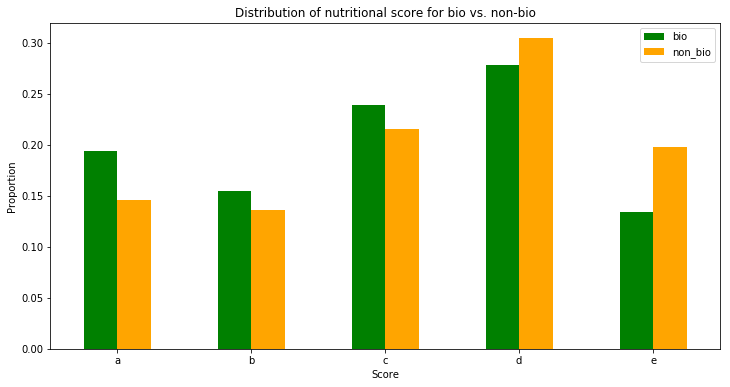

In [99]:
score_field = 'nutrition_grade_fr' # or 'nutrition-score-uk_100g'

scores_df = pd.DataFrame([bio_df[score_field].value_counts(normalize=True).sort_index().rename('bio'),
             non_bio_df[score_field].value_counts(normalize=True).sort_index().rename('non_bio')])

scores_df = scores_df.transpose()

scores_df.plot(kind='bar', color=['green', 'orange'], rot=0, figsize=(12, 6))

plt.title('Distribution of nutritional score for bio vs. non-bio')
plt.xlabel('Score')
plt.ylabel('Proportion')

plt.show()